https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Expectation-Maximization

In [1]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html
# Compute minimum distances between one point and a set of points.
from sklearn.metrics import pairwise_distances_argmin

In [2]:
def draw_points(ax, c, number_of_clusters, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, number_of_clusters, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(number_of_clusters), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

In [3]:
number_of_clusters=4
X, y_true = make_blobs(n_samples=300, centers=number_of_clusters,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(number_of_clusters, 2)

initial centers
[[ 0.49671415  3.8617357 ]
 [ 0.64768854  5.52302986]
 [-0.23415337  3.76586304]
 [ 1.57921282  4.76743473]]
centers 0
[[ 1.61788404  1.73021643]
 [-1.05544832  7.31289   ]
 [-1.53049092  2.89441674]
 [ 1.58028607  4.4210127 ]]
centers 1
[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.57084703  2.85535402]
 [ 0.97007666  4.41532732]]
centers 2
[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


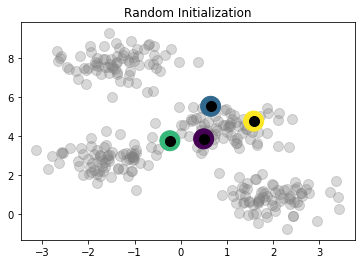

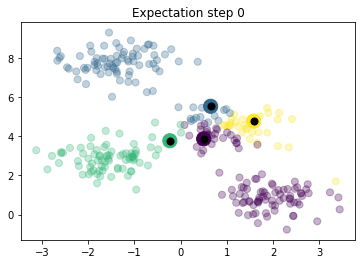

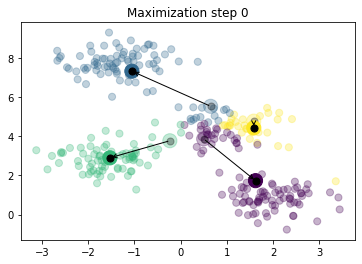

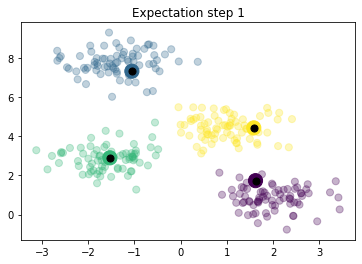

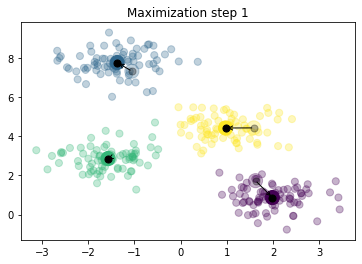

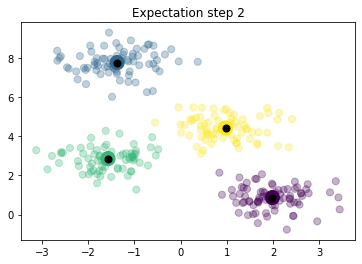

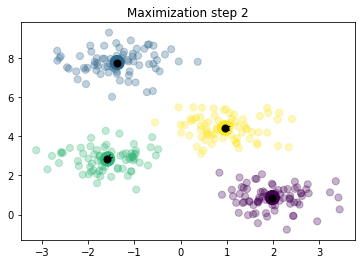

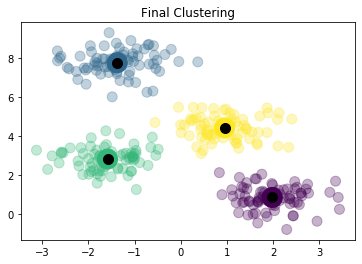

In [4]:
fig = plt.figure()
ax = plt.gca()
draw_points(ax, 'gray',number_of_clusters, factor=2)
draw_centers(ax, centers, number_of_clusters, factor=2)
print("initial centers")
print(centers)
plt.title('Random Initialization')

for indx in range(3):    
    # E-step
    fig = plt.figure()
    ax = plt.gca()
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax, y_pred, number_of_clusters)
    draw_centers(ax, centers, number_of_clusters)
    plt.title('Expectation step '+str(indx))
    
    # M-step
    fig = plt.figure()
    ax = plt.gca()
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(number_of_clusters)])
    # where the centers are:
    print("centers "+str(indx))
    print(new_centers)
    draw_points(ax, y_pred, number_of_clusters)
    draw_centers(ax, centers, number_of_clusters, alpha=0.3)
    draw_centers(ax, new_centers, number_of_clusters)
    for loop_index in range(number_of_clusters):
        ax.annotate('', new_centers[loop_index], centers[loop_index],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
    plt.title('Maximization step '+str(indx))
    
    # Finish iteration
    centers = new_centers

# Final E-step    
fig = plt.figure()
ax = plt.gca()
y_pred = pairwise_distances_argmin(X, centers)
draw_points(ax, y_pred, number_of_clusters, factor=2)
draw_centers(ax, centers, number_of_clusters, factor=2)
_=plt.title("Final Clustering")



In [5]:
def model_clusters(K=6):
    number_of_clusters = 4
    X, y_true = make_blobs(n_samples=300, centers=number_of_clusters,
                           cluster_std=0.60, random_state=0)

    number_of_clusters = K
    rng = np.random.RandomState(42)
    centers = [0, 4] + rng.randn(number_of_clusters, 2)
    
    fig = plt.figure()
    ax = plt.gca()
    draw_points(ax, 'gray',number_of_clusters, factor=2)
    draw_centers(ax, centers, number_of_clusters, factor=2)
    print("initial centers")
    print(centers)
    plt.title('Random Initialization')

    for indx in range(3):    
        # E-step
        fig = plt.figure()
        ax = plt.gca()
        y_pred = pairwise_distances_argmin(X, centers)
        draw_points(ax, y_pred, number_of_clusters)
        draw_centers(ax, centers, number_of_clusters)
        plt.title('Expectation step '+str(indx))

        # M-step
        fig = plt.figure()
        ax = plt.gca()
        new_centers = np.array([X[y_pred == i].mean(0) for i in range(number_of_clusters)])
        # where the centers are:
        print("centers "+str(indx))
        print(new_centers)
        draw_points(ax, y_pred, number_of_clusters)
        draw_centers(ax, centers, number_of_clusters, alpha=0.3)
        draw_centers(ax, new_centers, number_of_clusters)
        for loop_index in range(number_of_clusters):
            ax.annotate('', new_centers[loop_index], centers[loop_index],
                         arrowprops=dict(arrowstyle='->', linewidth=1))
        plt.title('Maximization step '+str(indx))

        # Finish iteration
        centers = new_centers

    # Final E-step    
    fig = plt.figure()
    ax = plt.gca()
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax, y_pred, number_of_clusters, factor=2)
    draw_centers(ax, centers, number_of_clusters, factor=2)
    _=plt.title("Final Clustering")



initial centers
[[ 0.49671415  3.8617357 ]
 [ 0.64768854  5.52302986]
 [-0.23415337  3.76586304]
 [ 1.57921282  4.76743473]]
centers 0
[[ 1.61788404  1.73021643]
 [-1.05544832  7.31289   ]
 [-1.53049092  2.89441674]
 [ 1.58028607  4.4210127 ]]
centers 1
[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.57084703  2.85535402]
 [ 0.97007666  4.41532732]]
centers 2
[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


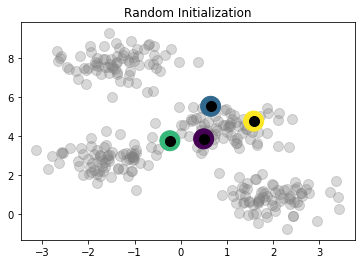

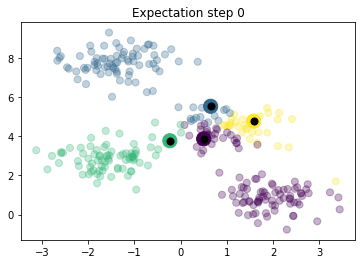

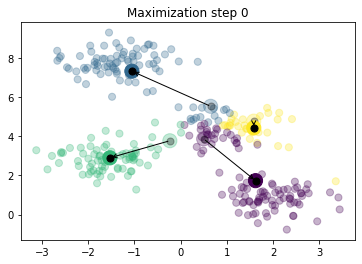

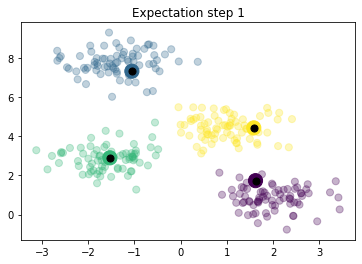

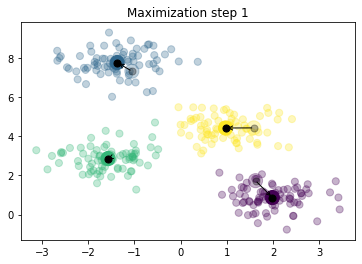

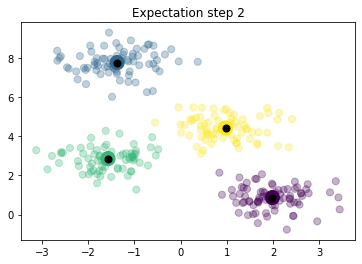

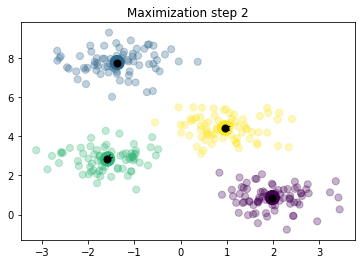

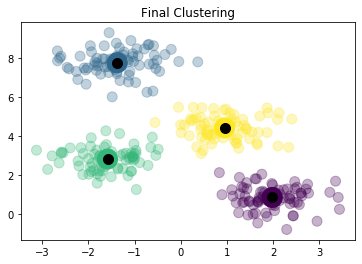

In [6]:
model_clusters( K=4)

initial centers
[[ 0.49671415  3.8617357 ]
 [ 0.64768854  5.52302986]
 [-0.23415337  3.76586304]
 [ 1.57921282  4.76743473]
 [-0.46947439  4.54256004]
 [-0.46341769  3.53427025]
 [ 0.24196227  2.08671976]
 [-1.72491783  3.43771247]
 [-1.01283112  4.31424733]
 [-0.90802408  2.5876963 ]]
centers 0
[[ 0.75785852  3.93807015]
 [-0.91566671  7.37563419]
 [-0.30348786  4.0628895 ]
 [ 1.51696739  4.51820671]
 [-0.00745706  4.70010888]
 [-0.73072035  3.32883513]
 [ 1.98258281  0.86771314]
 [-2.0309918   3.03738117]
 [-2.14366535  6.844845  ]
 [-1.35151472  2.47655263]]
centers 1
[[ 0.76750383  3.89637376]
 [-1.09681405  7.85044853]
 [-0.14008336  4.05087186]
 [ 1.45245627  4.56792106]
 [ 0.29277148  4.93580218]
 [-1.01242809  3.29575157]
 [ 1.98258281  0.86771314]
 [-2.07818476  3.06392468]
 [-2.13342628  7.48759919]
 [-1.44639834  2.35919828]]
centers 2
[[ 0.83585592  3.87429579]
 [-1.01712269  7.84786606]
 [-0.24394348  4.21214351]
 [ 1.49591184  4.57251111]
 [ 0.44295726  4.98718001]
 [-1.0

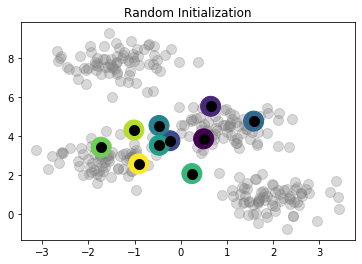

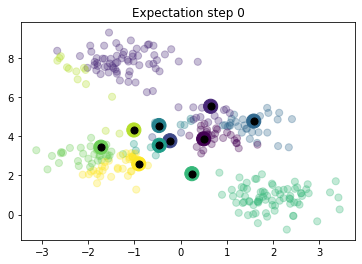

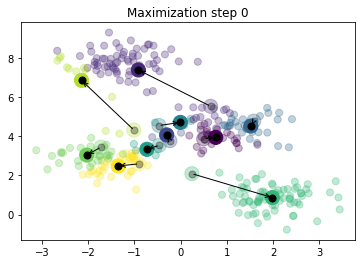

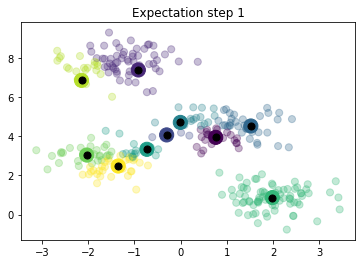

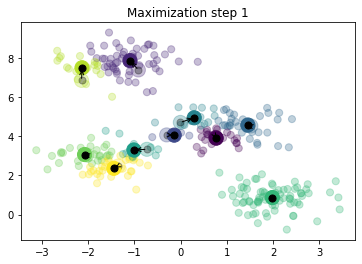

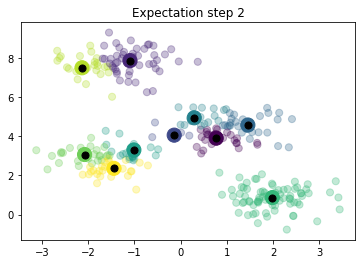

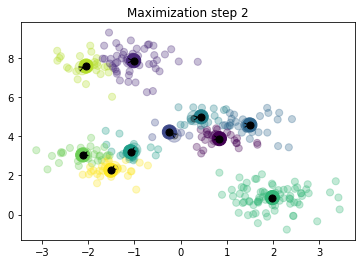

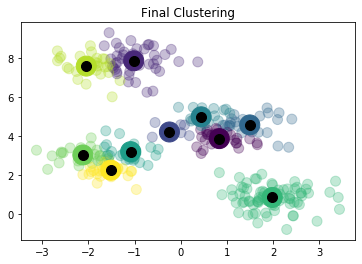

In [8]:
model_clusters( K=10)